<a id="1.1"></a>
<h3 style="background-color:powderblue;font-family:newtimeroman;font-size:150%;">We continue to apply machine learning models to solve the classification problem. Same Credit Card customers dataset. Decision Tree Model.</h3>


<a id="1.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;">Libraries</h3>

In [42]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

### Data preparation

In [2]:
c_data = pd.read_csv('D:/Coursera/Анализ данных/DataSets/BankChurners/BankChurners.csv')
c_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
c_data = c_data.drop(['CLIENTNUM',
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
                       axis = 1)
c_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
c_data.Attrition_Flag = c_data.Attrition_Flag.replace({'Attrited Customer': 1,'Existing Customer': 0})
c_data.Gender = c_data.Gender.replace({'F': 1,'M': 0})
c_data = pd.concat([c_data, pd.get_dummies(c_data['Education_Level']).drop(columns = ['Unknown'])], axis = 1)
c_data = pd.concat([c_data, pd.get_dummies(c_data['Income_Category']).drop(columns = ['Unknown'])], axis = 1)
c_data = pd.concat([c_data, pd.get_dummies(c_data['Marital_Status']).drop(columns = ['Unknown'])], axis = 1)
c_data = pd.concat([c_data, pd.get_dummies(c_data['Card_Category']).drop(columns = ['Platinum'])], axis = 1)
c_data.drop(columns = ['Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category'], inplace = True)
c_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,0,45,0,3,39,5,1,3,12691.0,777,...,0,1,0,0,0,1,0,1,0,0
1,0,49,1,5,44,6,1,2,8256.0,864,...,0,0,0,1,0,0,1,1,0,0
2,0,51,0,3,36,4,1,0,3418.0,0,...,0,0,1,0,0,1,0,1,0,0
3,0,40,1,4,34,3,4,1,3313.0,2517,...,0,0,0,1,0,0,0,1,0,0
4,0,40,0,3,21,5,1,0,4716.0,0,...,0,1,0,0,0,1,0,1,0,0


In [5]:
y = c_data['Attrition_Flag']
x = c_data.drop('Attrition_Flag', axis = 1)

x_train_80, x_test_20, y_train_80, y_test_20 = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print(y_train_80.value_counts())
print(y_test_20.value_counts())

0    6799
1    1302
Name: Attrition_Flag, dtype: int64
0    1701
1     325
Name: Attrition_Flag, dtype: int64


<a id="3"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;">Decision Tree (raw data)</h1>

In [6]:
# Initial parameters
model = DecisionTreeClassifier(random_state=42,
                               criterion='gini',
                               max_depth=5,
                               min_samples_split=5,
                               min_samples_leaf=5,
                               class_weight=None
                               )

model.fit(x_train_80, y_train_80)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

#### Let's check the importance of the features

In [9]:
pd.DataFrame({'feature': x.columns,
             'importance': model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
12,Total_Trans_Ct,0.394570
8,Total_Revolving_Bal,0.257476
4,Total_Relationship_Count,0.135374
11,Total_Trans_Amt,0.113481
13,Total_Ct_Chng_Q4_Q1,0.068266
10,Total_Amt_Chng_Q4_Q1,0.012451
0,Customer_Age,0.009105
6,Contacts_Count_12_mon,0.007241
9,Avg_Open_To_Buy,0.002036
27,Married,0.000000


### Let's set the range of model parameters to find the optimal combination

In [10]:
params_set = {
    'max_depth': range(4, 10),
    'min_samples_split': range(4, 10),
    'min_samples_leaf': range(4, 10),
    'splitter': ['best', 'random']
}

grid = GridSearchCV(estimator = model,
                   param_grid = params_set,
                   scoring = 'roc_auc',
                   cv = 5,
                   n_jobs = -1)

# from feature_importances
x_train_80 = x_train_80[['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Relationship_Count', 'Total_Trans_Amt',
                         'Total_Ct_Chng_Q4_Q1', 'Total_Amt_Chng_Q4_Q1', 'Customer_Age', 'Contacts_Count_12_mon',
                         'Avg_Open_To_Buy']]

x_test_20 = x_test_20[['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Relationship_Count', 'Total_Trans_Amt',
                         'Total_Ct_Chng_Q4_Q1', 'Total_Amt_Chng_Q4_Q1', 'Customer_Age', 'Contacts_Count_12_mon',
                         'Avg_Open_To_Buy']]

grid.fit(x_train_80, y_train_80)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, min_samples_leaf=5,
                                              min_samples_split=5,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(4, 10),
                         'min_samples_leaf': range(4, 10),
                         'min_samples_split': range(4, 10),
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [11]:
grid.best_params_

{'max_depth': 7,
 'min_samples_leaf': 8,
 'min_samples_split': 4,
 'splitter': 'best'}

### Let's fit our model with the optimal parameters

In [12]:
model_1 = grid.best_estimator_

### Evaluate the model with the probability prediction approach

In [14]:
model_1.fit(x_train_80, y_train_80)

d = {}
threshold_list = np.arange(0.05, 1, 0.05)
pred_proba_df = pd.DataFrame(model_1.predict_proba(x_test_20))
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
    f1_score = metrics.f1_score(y_test_20, Y_test_pred.iloc[:,1], pos_label = 1, average='binary')
    print('Our testing f1_score is {}'.format(f1_score))
    cm = metrics.confusion_matrix(y_test_20, Y_test_pred.iloc[:,1])
    d[f1_score] = cm
    print(metrics.confusion_matrix(y_test_20, Y_test_pred.iloc[:,1]))
    print(metrics.classification_report(y_test_20, Y_test_pred.iloc[:,1]))
    
for i in d:
    print(i)
    print(d[i])


******** For i = 0.05 ******
Our testing f1_score is 0.7587096774193548
[[1545  156]
 [  31  294]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1701
           1       0.65      0.90      0.76       325

    accuracy                           0.91      2026
   macro avg       0.82      0.91      0.85      2026
weighted avg       0.93      0.91      0.91      2026


******** For i = 0.1 ******
Our testing f1_score is 0.765399737876802
[[1555  146]
 [  33  292]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      1701
           1       0.67      0.90      0.77       325

    accuracy                           0.91      2026
   macro avg       0.82      0.91      0.86      2026
weighted avg       0.93      0.91      0.92      2026


******** For i = 0.15000000000000002 ******
Our testing f1_score is 0.7804195804195805
[[1590  111]
 [  46  279]]
              precision    recall

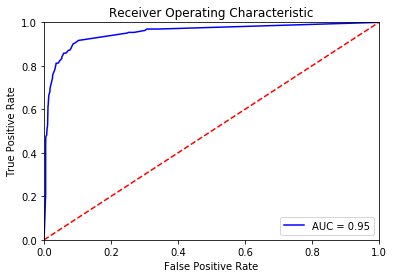

In [15]:
y_hat = model_1.predict_proba(x_test_20)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test_20, y_hat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a id="3"></a>
<h1 style="background-color:powderblue;font-family:newtimeroman;font-size:150%;text-align:center;">Decision Tree (raw data) has: f-score = 0.81 (for class 1); precision = 0.81 (for class 1); recall = 0.81 (for class 1); AUC = 0.95</h1>

<a id="3"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;">Decision Tree (standardized data)</h1>

### Although data normalization (standardization) in the context of applying Decision Tree models does not make any sense, we will still go through this step for the information content of the general analytical table.

#### Let's use the information about the features importance from the previous model

In [30]:
y = c_data['Attrition_Flag']
x = c_data[['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Relationship_Count', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1',
           'Total_Amt_Chng_Q4_Q1', 'Customer_Age', 'Contacts_Count_12_mon', 'Avg_Open_To_Buy']]

In [31]:
pt = preprocessing.PowerTransformer()
normalize_data_x = pt.fit_transform(x)
   
normalize_data_x = pd.DataFrame(normalize_data_x, columns = x.columns)
normalize_data_x.head()

,Total_Trans_Ct,Total_Revolving_Bal,Total_Relationship_Count,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Total_Amt_Chng_Q4_Q1,Customer_Age,Contacts_Count_12_mon,Avg_Open_To_Buy
0,-0.964211,-0.003768,0.762305,-1.820680,3.016295,2.259377,-0.168365,0.495883,0.930320
1,-1.397079,0.076214,1.417080,-1.605685,6.011005,2.803534,0.331118,-0.406084,0.554222
2,-2.078301,-1.666149,0.112803,-0.953314,4.359489,4.654269,0.581381,-2.246757,-0.041640
3,-2.078301,1.114008,-0.530415,-1.778915,4.359489,2.454134,-0.790608,-1.318361,-1.128002
4,-1.649743,-1.666149,0.762305,-2.440781,4.612643,4.056715,-0.790608,-2.246757,0.205257


In [32]:
x_train_80, x_test_20, y_train_80, y_test_20 = train_test_split(normalize_data_x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print(y_train_80.value_counts())
print(y_test_20.value_counts())

0    6799
1    1302
Name: Attrition_Flag, dtype: int64
0    1701
1     325
Name: Attrition_Flag, dtype: int64


In [33]:
# Initial parameters
model1 = DecisionTreeClassifier(random_state=42,
                               criterion='gini',
                               max_depth=5,
                               min_samples_split=5,
                               min_samples_leaf=5,
                               class_weight=None
                               )


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

### Let's set the range of model parameters to find the optimal combination

In [36]:
params_set = {
    'max_depth': range(4, 10),
    'min_samples_split': range(4, 10),
    'min_samples_leaf': range(4, 10),
    'splitter': ['best', 'random']
}

grid1 = GridSearchCV(estimator = model1,
                   param_grid = params_set,
                   scoring = 'roc_auc',
                   cv = 5,
                   n_jobs = -1)
grid1.fit(x_train_80, y_train_80)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, min_samples_leaf=5,
                                              min_samples_split=5,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(4, 10),
                         'min_samples_leaf': range(4, 10),
                         'min_samples_split': range(4, 10),
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [37]:
grid1.best_params_

{'max_depth': 7,
 'min_samples_leaf': 8,
 'min_samples_split': 4,
 'splitter': 'best'}

In [39]:
model2 = grid1.best_estimator_

In [40]:
model2.fit(x_train_80, y_train_80)

d = {}
threshold_list = np.arange(0.05, 1, 0.05)
pred_proba_df = pd.DataFrame(model2.predict_proba(x_test_20))
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
    f1_score = metrics.f1_score(y_test_20, Y_test_pred.iloc[:,1], pos_label = 1, average='binary')
    print('Our testing f1_score is {}'.format(f1_score))
    cm = metrics.confusion_matrix(y_test_20, Y_test_pred.iloc[:,1])
    d[f1_score] = cm
    print(metrics.confusion_matrix(y_test_20, Y_test_pred.iloc[:,1]))
    print(metrics.classification_report(y_test_20, Y_test_pred.iloc[:,1]))
    
for i in d:
    print(i)
    print(d[i])


******** For i = 0.05 ******
Our testing f1_score is 0.7587096774193548
[[1545  156]
 [  31  294]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1701
           1       0.65      0.90      0.76       325

    accuracy                           0.91      2026
   macro avg       0.82      0.91      0.85      2026
weighted avg       0.93      0.91      0.91      2026


******** For i = 0.1 ******
Our testing f1_score is 0.765399737876802
[[1555  146]
 [  33  292]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      1701
           1       0.67      0.90      0.77       325

    accuracy                           0.91      2026
   macro avg       0.82      0.91      0.86      2026
weighted avg       0.93      0.91      0.92      2026


******** For i = 0.15000000000000002 ******
Our testing f1_score is 0.7804195804195805
[[1590  111]
 [  46  279]]
              precision    recall

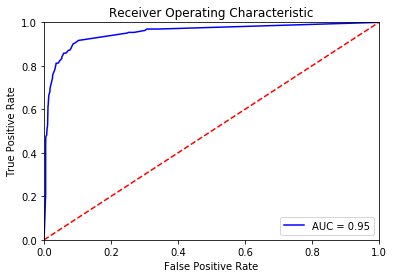

In [41]:
y_hat = model2.predict_proba(x_test_20)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test_20, y_hat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a id="3"></a>
<h1 style="background-color:powderblue;font-family:newtimeroman;font-size:150%;text-align:center;">Decision Tree (standardized data) has: f-score = 0.81 (for class 1); precision = 0.81 (for class 1); recall = 0.81 (for class 1); AUC = 0.95</h1>

<a id="3"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;">Decision Tree SMOTE (standardized data)</h1>

### Let's leave 20% of the data in which there will be no synthesized samples, for the purity of the test

In [43]:
y = c_data['Attrition_Flag']
x = c_data.drop('Attrition_Flag', axis = 1)
x_c_data, x_realtest, y_c_data, y_realtest = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [44]:
oversample = SMOTE()
X, Y = oversample.fit_resample(x_c_data, y_c_data)

In [46]:
print(len(Y))
print(X.info())

13598
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13598 entries, 0 to 13597
Data columns (total 32 columns):
Customer_Age                13598 non-null int64
Gender                      13598 non-null int64
Dependent_count             13598 non-null int64
Months_on_book              13598 non-null int64
Total_Relationship_Count    13598 non-null int64
Months_Inactive_12_mon      13598 non-null int64
Contacts_Count_12_mon       13598 non-null int64
Credit_Limit                13598 non-null float64
Total_Revolving_Bal         13598 non-null int64
Avg_Open_To_Buy             13598 non-null float64
Total_Amt_Chng_Q4_Q1        13598 non-null float64
Total_Trans_Amt             13598 non-null int64
Total_Trans_Ct              13598 non-null int64
Total_Ct_Chng_Q4_Q1         13598 non-null float64
Avg_Utilization_Ratio       13598 non-null float64
College                     13598 non-null uint8
Doctorate                   13598 non-null uint8
Graduate                    13598 non-null

In [48]:
Y.value_counts()

1    6799
0    6799
Name: Attrition_Flag, dtype: int64

#### Let's use the information about the features importance from the previous model

In [49]:
X = X[['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Relationship_Count', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1',
           'Total_Amt_Chng_Q4_Q1', 'Customer_Age', 'Contacts_Count_12_mon', 'Avg_Open_To_Buy']]

In [50]:
pt = preprocessing.PowerTransformer()
normalize_data_x = pt.fit_transform(X)
   
normalize_data_x = pd.DataFrame(normalize_data_x, columns = X.columns)
normalize_data_x.head()

,Total_Trans_Ct,Total_Revolving_Bal,Total_Relationship_Count,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Total_Amt_Chng_Q4_Q1,Customer_Age,Contacts_Count_12_mon,Avg_Open_To_Buy
0,-0.564079,1.006658,0.427364,-0.827889,-0.892103,-0.157034,-1.413193,-0.515361,-1.799680
1,-0.782460,-1.301334,1.027965,-0.393887,-0.202397,0.625446,-0.327122,0.462124,1.547088
2,1.354073,0.533472,1.596246,0.562839,0.932889,0.816926,-0.053760,-1.489756,0.837254
3,-0.617394,0.818221,-0.214559,-0.930871,-1.357595,0.715224,-1.413193,0.462124,-0.695498
4,0.759055,0.662426,0.427364,0.419394,0.382314,0.038945,0.494969,0.462124,1.782043


In [51]:
x_train_80, x_test_20, y_train_80, y_test_20 = train_test_split(normalize_data_x, Y, test_size=0.2, random_state=42,
                                                                shuffle=True, stratify=Y)
print(y_train_80.value_counts())
print(y_test_20.value_counts())

1    5439
0    5439
Name: Attrition_Flag, dtype: int64
1    1360
0    1360
Name: Attrition_Flag, dtype: int64


In [52]:
# Initial parameters
smote_Model = DecisionTreeClassifier(random_state=42,
                               criterion='gini',
                               max_depth=5,
                               min_samples_split=5,
                               min_samples_leaf=5,
                               class_weight=None
                               )

### Let's set the range of model parameters to find the optimal combination

In [54]:
params_set = {
    'max_depth': range(4, 10),
    'min_samples_split': range(4, 10),
    'min_samples_leaf': range(4, 10),
    'splitter': ['best', 'random']
}

grid2 = GridSearchCV(estimator = smote_Model,
                   param_grid = params_set,
                   scoring = 'roc_auc',
                   cv = 5,
                   n_jobs = -1)

grid2.fit(x_train_80, y_train_80)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, min_samples_leaf=5,
                                              min_samples_split=5,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(4, 10),
                         'min_samples_leaf': range(4, 10),
                         'min_samples_split': range(4, 10),
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [55]:
grid2.best_params_

{'max_depth': 9,
 'min_samples_leaf': 9,
 'min_samples_split': 4,
 'splitter': 'best'}

In [56]:
smote_Model2 = grid1.best_estimator_

In [57]:
smote_Model2.fit(x_train_80, y_train_80)

d = {}
threshold_list = np.arange(0.05, 1, 0.05)
pred_proba_df = pd.DataFrame(smote_Model2.predict_proba(x_test_20))
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
    f1_score = metrics.f1_score(y_test_20, Y_test_pred.iloc[:,1], pos_label = 1, average='binary')
    print('Our testing f1_score is {}'.format(f1_score))
    cm = metrics.confusion_matrix(y_test_20, Y_test_pred.iloc[:,1])
    d[f1_score] = cm
    print(metrics.confusion_matrix(y_test_20, Y_test_pred.iloc[:,1]))
    print(metrics.classification_report(y_test_20, Y_test_pred.iloc[:,1]))
    
for i in d:
    print(i)
    print(d[i])


******** For i = 0.05 ******
Our testing f1_score is 0.896391923204237
[[1053  307]
 [   6 1354]]
              precision    recall  f1-score   support

           0       0.99      0.77      0.87      1360
           1       0.82      1.00      0.90      1360

    accuracy                           0.88      2720
   macro avg       0.90      0.88      0.88      2720
weighted avg       0.90      0.88      0.88      2720


******** For i = 0.1 ******
Our testing f1_score is 0.9223901098901098
[[1151  209]
 [  17 1343]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      1360
           1       0.87      0.99      0.92      1360

    accuracy                           0.92      2720
   macro avg       0.93      0.92      0.92      2720
weighted avg       0.93      0.92      0.92      2720


******** For i = 0.15000000000000002 ******
Our testing f1_score is 0.9298611111111111
[[1179  181]
 [  21 1339]]
              precision    recall

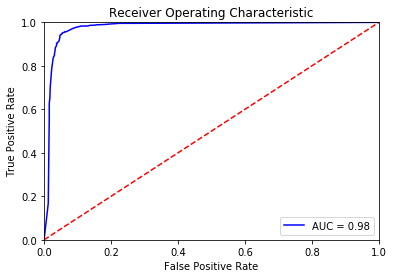

In [58]:
y_hat = smote_Model2.predict_proba(x_test_20)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test_20, y_hat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a id="3"></a>
<h1 style="background-color:powderblue;font-family:newtimeroman;font-size:150%;text-align:center;">Decision Tree SMOTE (standardized data), as a result has: f-score = 0.95 (for class 1); precision = 0.94 (for class 1); recall = 0.96 (for class 1); AUC = 0.98</h1>

### Now we will make a test on real (no synthetic) data - 'x_realtest', 'y_realtest'

In [60]:
x_realtest = x_realtest[['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Relationship_Count', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1',
           'Total_Amt_Chng_Q4_Q1', 'Customer_Age', 'Contacts_Count_12_mon', 'Avg_Open_To_Buy']]

In [61]:
x_realtest_n = pt.fit_transform(x_realtest)

x_realtest_n = pd.DataFrame(x_realtest_n, columns = x_realtest.columns)
x_realtest_n.head()

,Total_Trans_Ct,Total_Revolving_Bal,Total_Relationship_Count,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Total_Amt_Chng_Q4_Q1,Customer_Age,Contacts_Count_12_mon,Avg_Open_To_Buy
0,0.238679,0.901548,0.109270,-0.112032,-0.494896,1.269512,2.333333,-0.403063,-0.855880
1,1.646171,-1.648484,-1.173477,2.028648,0.133706,0.765380,-0.624164,-1.336156,0.868845
2,-0.644556,-1.648484,0.756987,-0.207954,-0.384502,2.367599,-1.848217,-0.403063,-0.587913
3,0.696837,-0.307447,-1.173477,0.364949,1.611569,0.035684,0.605193,-1.336156,-0.977582
4,0.365312,0.332862,1.407971,0.526505,0.211904,0.132599,0.605193,0.510182,-1.636531


In [62]:
y_hat_sm = smote_Model2.predict_proba(x_realtest_n)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_realtest, y_hat_sm)
roc_auc = metrics.auc(fpr, tpr)

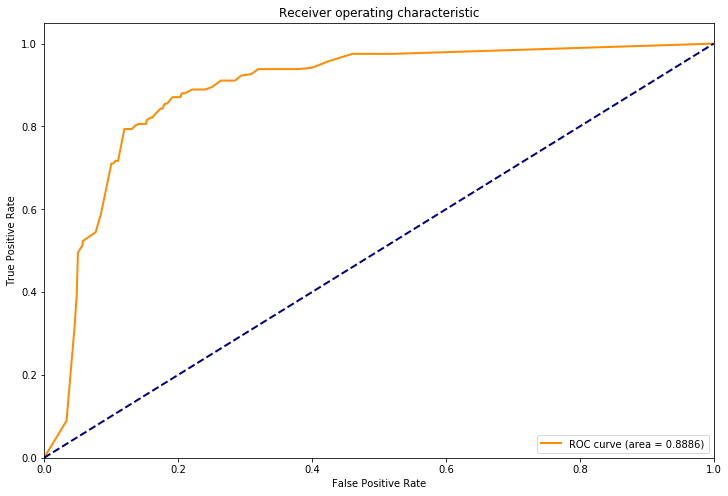

In [63]:
plt.figure(figsize = (12, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [64]:
pred_proba_df = pd.DataFrame(smote_Model2.predict_proba(x_realtest_n))
threshold_list = np.arange(0.025, 1, 0.025)
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    f1_score = metrics.f1_score(y_realtest, Y_test_pred.iloc[:,1], pos_label = 1, average = 'binary')
    print('Our testing f1_score is {}'.format(f1_score))

    print(metrics.confusion_matrix(y_realtest, Y_test_pred.iloc[:,1]))
    print(metrics.classification_report(y_realtest, Y_test_pred.iloc[:,1]))


******** For i = 0.025 ******
Our testing f1_score is 0.44491228070175437
[[918 783]
 [  8 317]]
              precision    recall  f1-score   support

           0       0.99      0.54      0.70      1701
           1       0.29      0.98      0.44       325

    accuracy                           0.61      2026
   macro avg       0.64      0.76      0.57      2026
weighted avg       0.88      0.61      0.66      2026


******** For i = 0.05 ******
Our testing f1_score is 0.44491228070175437
[[918 783]
 [  8 317]]
              precision    recall  f1-score   support

           0       0.99      0.54      0.70      1701
           1       0.29      0.98      0.44       325

    accuracy                           0.61      2026
   macro avg       0.64      0.76      0.57      2026
weighted avg       0.88      0.61      0.66      2026


******** For i = 0.07500000000000001 ******
Our testing f1_score is 0.5012325390304027
[[1114  587]
 [  20  305]]
              precision    recall  f



******** For i = 0.6000000000000001 ******
Our testing f1_score is 0.6108048511576626
[[1396  305]
 [  48  277]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1701
           1       0.48      0.85      0.61       325

    accuracy                           0.83      2026
   macro avg       0.72      0.84      0.75      2026
weighted avg       0.89      0.83      0.84      2026


******** For i = 0.6250000000000001 ******
Our testing f1_score is 0.6088888888888888
[[1400  301]
 [  51  274]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      1701
           1       0.48      0.84      0.61       325

    accuracy                           0.83      2026
   macro avg       0.72      0.83      0.75      2026
weighted avg       0.89      0.83      0.84      2026


******** For i = 0.65 ******
Our testing f1_score is 0.6122905027932961
[[1405  296]
 [  51  274]]
              pre

<a id="3"></a>
<h1 style="background-color:powderblue;font-family:newtimeroman;font-size:150%;text-align:center;">Decision Tree SMOTE (standardized data) - no synthetic test, as a result has: f-score = 0.64 (for class 1); precision = 0.54 (for class 1); recall = 0.79 (for class 1); AUC = 0.8886</h1>